#**▲"Análisis de ventas de Fleet DEZ SA para Proyecto final DS de Coderhouse"**

---



**En este trabajo final parte 3 de Coder House se realizará un análisis detallado de las ventas de la empresa Fleet DEZ SA durante el año 2023. Utilizaremos técnicas de segmentación de datos aprendidas en la cursada, en particular el algoritmo K-means, para identificar patrones y agrupar a los clientes en clústeres según sus comportamientos de compra. Emplearemos el método del codo para determinar el número óptimo de clústeres, con el objetivo de diseñar estrategias de marketing más efectivas y personalizadas. Además, se presentarán visualizaciones que ayudarán a comprender la distribución de las ventas y la proporción de ingresos generada por los principales clientes. Este análisis permitirá a la empresa optimizar la asignación de recursos y mejorar la toma de decisiones estratégicas.**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

# Cargo el dataset desde Google Drive, en clase utilizamos el nomeclatura df, en mi caso para no cinfundirme llamara la dataframe como "data"

from google.colab import drive
drive.mount('/content/drive')

# Cambio esta ruta al path de tu archivo en Google Drive
data = pd.read_excel('/content/drive/My Drive/TP DS/TPF/Ventas 2023.xlsx')

data.head()




Mounted at /content/drive


,Fecha de emisión,IDMOTIVO,Fecha de emisión(2),Hora de emisión (hh:mm:ss),Hora emisión hh,Tipo comprobante,Nro. comprobante,Día del Mes,Día de la Semana,Cód. Talonario,...,Cód. asiento,Desc. asiento,Cód. Motivo Nota de Crédito,Motivo Nota de Crédito,Cód. Dirección de entrega,Cód. provincia (Dirección entrega),Nombre provincia (Dirección entrega),Orden Tango Tiendas,tc,ventas USD
0,2023-01-02,NaN,2023-01-02,15:02:13,15 hs.,FAC,A0000700003603,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,7576.814393
1,2023-01-02,NaN,2023-01-02,17:48:18,17 hs.,FAC,A0000700003606,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,318.605116
2,2023-01-02,NaN,2023-01-02,17:58:50,17 hs.,FAC,A0000700003607,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,3,Córdoba,Ver detalle,346,327.963757
3,2023-01-02,NaN,2023-01-02,15:11:04,15 hs.,FAC,A0000800001666,2,LUNES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,1188.034682
4,2023-01-02,NaN,2023-01-02,12:12:33,12 hs.,FAC,A0000700003627,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,0,Capital Federal,Ver detalle,346,3685.608844


#**▲Quiero sabes la proporción de venta en USD agrupado por clientes, que se detalle los 5 principales clientes y los demás lo agrupe en "otros"**


---




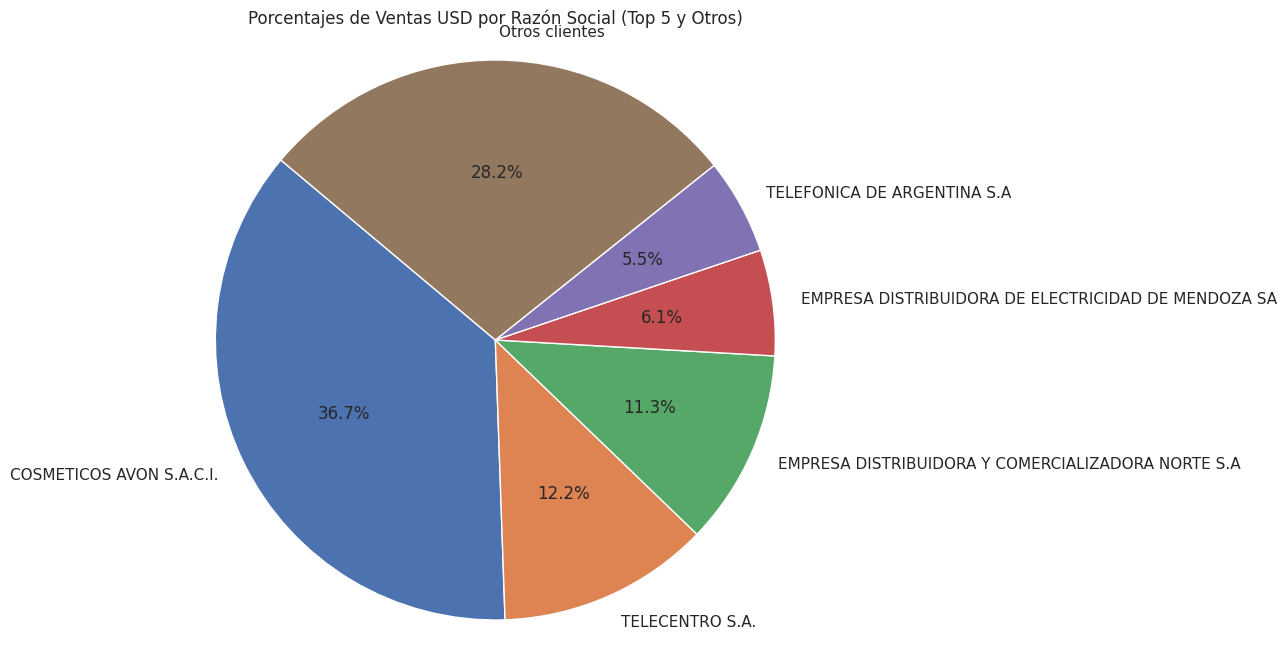

In [2]:
# Agrupo los datos por "Razón social" y sumar las "ventas USD"
grouped_data = data.groupby('Razón social')['ventas USD'].sum()

# Ordeno los datos y seleccionar los 5 clientes más grandes
top_5 = grouped_data.nlargest(5)

# Calculo el total de los otros clientes
other = grouped_data.sum() - top_5.sum()

# creo una Serie con los top 5 y los otros
top_5['Otros clientes'] = other

# creo el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentajes de Ventas USD por Razón Social (Top 5 y Otros)')
plt.axis('equal')
plt.show()

**Conclusión: Cosmeticos Avon es el principal cliente de logistica Fleet DEZ SA, seguido por "Telecentro"**

# **▲Quiero conocer las ventas en USD en función de la fechas del 2023**


---






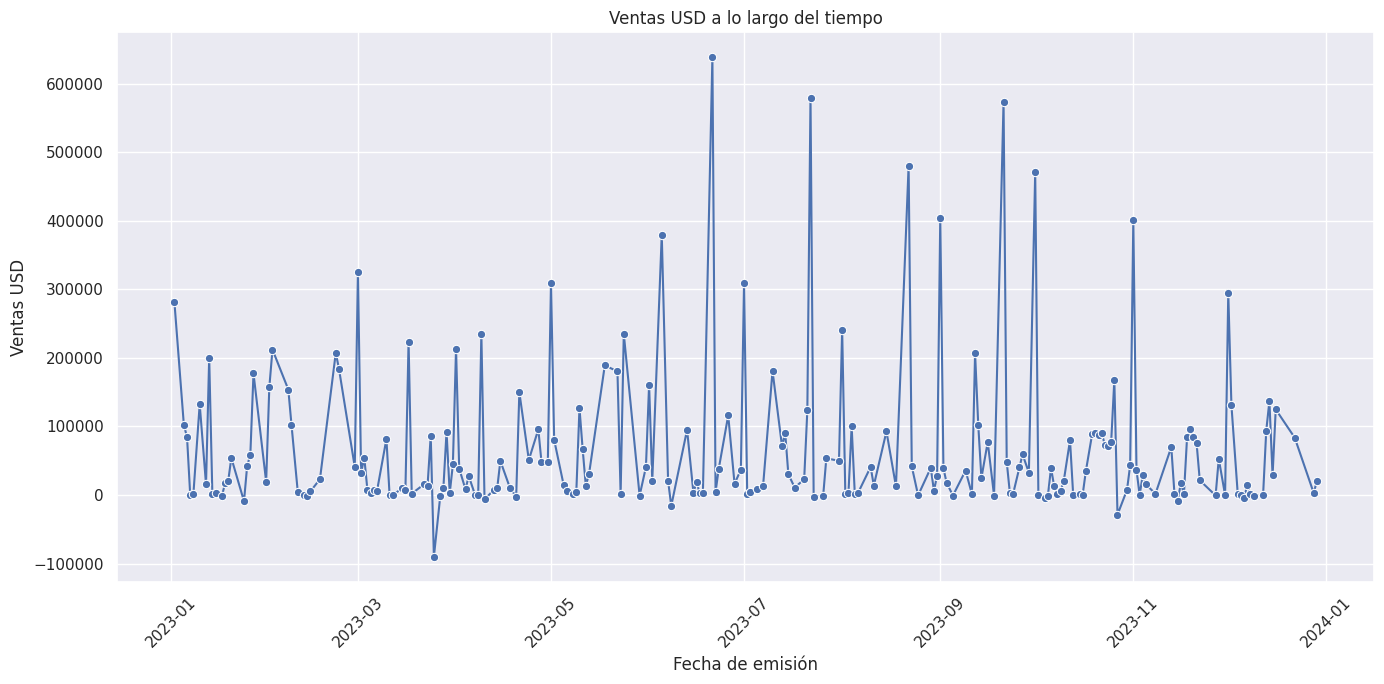

In [3]:
# Me aseguro de que la columna 'Fecha de emisión' sea de tipo datetime
data['Fecha de emisión'] = pd.to_datetime(data['Fecha de emisión'])

# Agrupo las ventas por fecha
time_series = data.groupby('Fecha de emisión')['ventas USD'].sum()

# Creo el gráfico de tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series, marker='o')
plt.title('Ventas USD a lo largo del tiempo')
plt.xlabel('Fecha de emisión')
plt.ylabel('Ventas USD')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

#**▲Se necesita saber las ventas netas que acumulan cada tipo de comprobante (en el caso de "Nota de Credito" y "Ajustes" se mostrara en negativo ya que es saldo a favor del cliente)**

---



<ipython-input-4-a55dc6f11bbf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='SubTotal', y='Desc. talonario', palette='viridis')


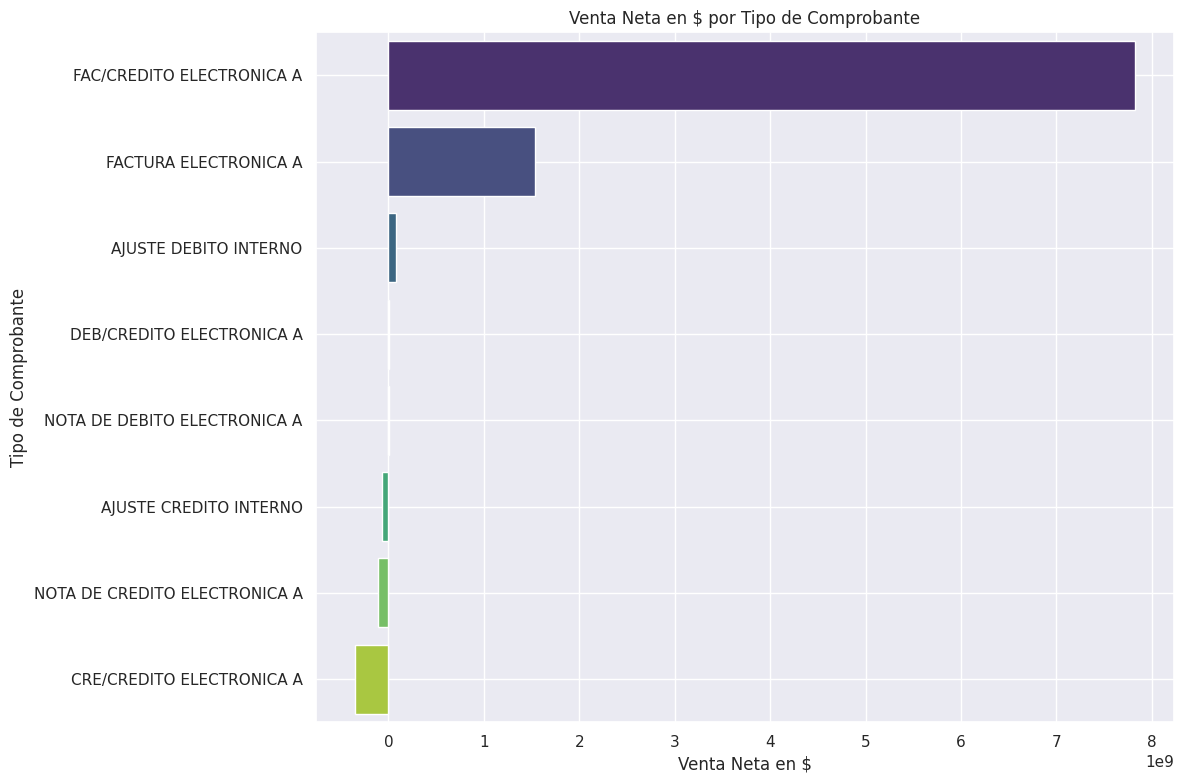

In [4]:
# Agrupo los datos por "Desc. talonario" y sumar los "SubTotal"
grouped_data = data.groupby('Desc. talonario')['SubTotal'].sum().reset_index()

# Ordeno los datos por "SubTotal" de manera descendente para un mejor gráfico
grouped_data = grouped_data.sort_values(by='SubTotal', ascending=False)

# creo el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='SubTotal', y='Desc. talonario', palette='viridis')
plt.title('Venta Neta en $ por Tipo de Comprobante')
plt.xlabel('Venta Neta en $')
plt.ylabel('Tipo de Comprobante')
plt.grid(True)
plt.tight_layout()
plt.show()

**"Conclusión: las Facturas Electronicas son las que acumulan mayor importe en ventas netas en pesos"**


In [5]:
# verifico los tipos de datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Fecha de emisión                                 1616 non-null   datetime64[ns]
 1   IDMOTIVO                                         0 non-null      float64       
 2   Fecha de emisión(2)                              1616 non-null   datetime64[ns]
 3   Hora de emisión (hh:mm:ss)                       1616 non-null   object        
 4   Hora emisión hh                                  1616 non-null   object        
 5   Tipo comprobante                                 1616 non-null   object        
 6   Nro. comprobante                                 1616 non-null   object        
 7   Día del Mes                                      1616 non-null   int64         
 8   Día de la Semana                      


#**▲Se crea un algoritmo de regresión para pronosticar las ventas 2024 en función de las ventas 2023**

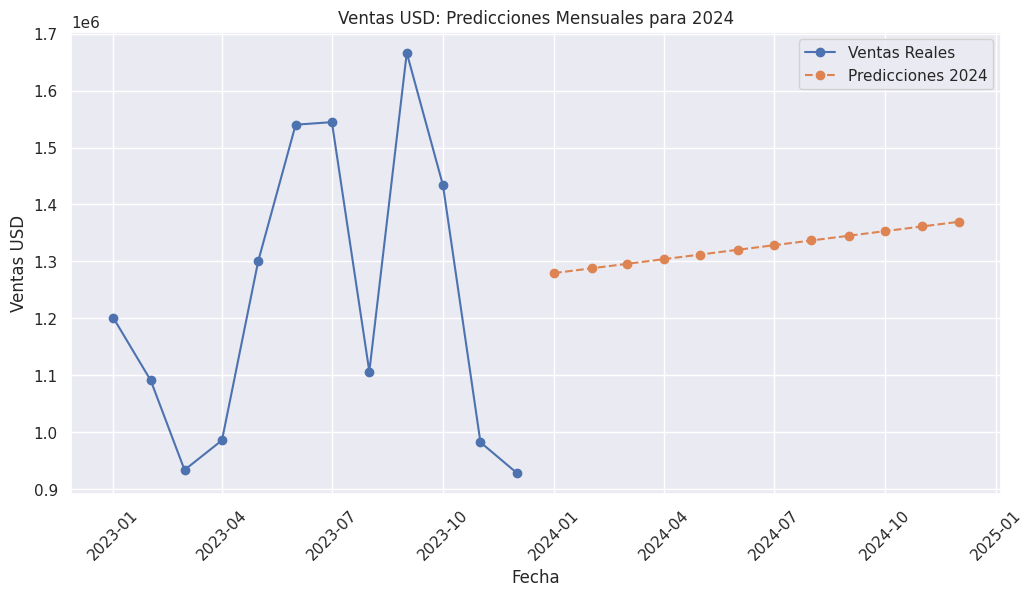

In [ ]:




# Creo una columna de año y mes
data['AñoMes'] = data['Fecha de emisión'].dt.to_period('M')

# Agrupo las ventas por año y mes
monthly_sales = data.groupby('AñoMes')['ventas USD'].sum().reset_index()
monthly_sales['AñoMes'] = monthly_sales['AñoMes'].dt.to_timestamp()

X = monthly_sales[['AñoMes']].astype('int64')  # Convertir fechas a enteros
y = monthly_sales['ventas USD']

model = LinearRegression()
model.fit(X, y)

fechas_2024 = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')
X_futuro = pd.DataFrame(fechas_2024, columns=['AñoMes']).astype('int64')

predicciones_2024 = model.predict(X_futuro)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['AñoMes'], y, label='Ventas Reales', marker='o')
plt.plot(fechas_2024, predicciones_2024, label='Predicciones 2024', linestyle='--', marker='o')
plt.title('Ventas USD: Predicciones Mensuales para 2024')
plt.xlabel('Fecha')
plt.ylabel('Ventas USD')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Conclusión: se observa una pendiente levemente inclinada y se estima que las
 ventas 2024 creceran de forma mesurada durante ese año, empezando el año con una suba considerable con respecto a Diciembre 2023, y  al finalizar el año las ventas no superaran los USD1.4MM"**


---



#**▲Creamos un gráfico de clúster mediante el método del codo es identificar el número óptimo de clústeres (k) para agrupar los datos de ventas en USD y otra variable de "total de ventas". Esto nos ayudará a descubrir patrones y segmentar nuestros clientes en grupos más homogéneos en función de sus comportamientos de compra.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

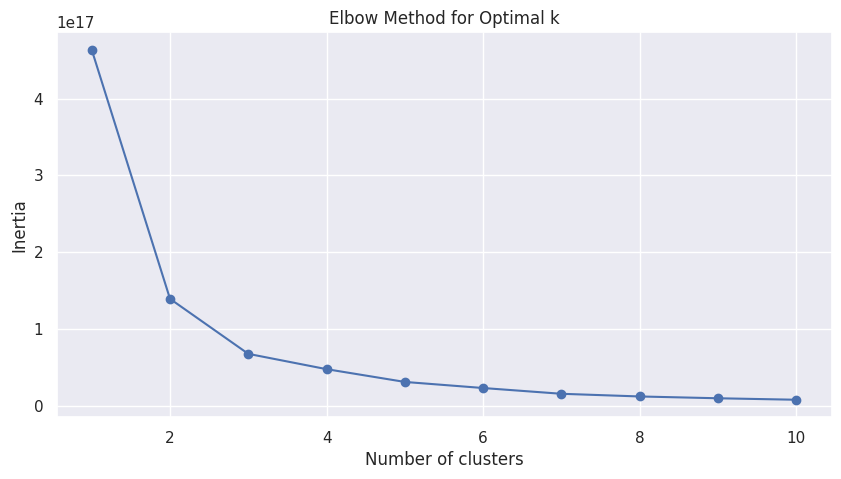

In [ ]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

# Seleccionar las columnas de interés
columns_of_interest = data[['ventas USD', 'Total']]

# Llamar a la función para optimizar el número de clústeres
optimize_k_means(columns_of_interest, 10)

**Conclusión: Se observa que el número óptimo de clústeres es tres, ya que a partir de este punto la disminución de la inercia se estabiliza. Esta segmentación permitirá a la empresa diseñar estrategias de marketing personalizadas y optimizar la asignación de recursos, mejorando la toma de decisiones y aumentando la efectividad en la atención a diferentes grupos de clientes.**


#**▲Solicitan sacar los datos NaN del Campo "Localidades"**

In [7]:
# Se eliminan filas que tienen NaN en la columna 'Localidad'
data.dropna(subset=['Localidad'], inplace=True)

# Se muestra el dataset modificado.
data


,Fecha de emisión,IDMOTIVO,Fecha de emisión(2),Hora de emisión (hh:mm:ss),Hora emisión hh,Tipo comprobante,Nro. comprobante,Día del Mes,Día de la Semana,Cód. Talonario,...,Cód. asiento,Desc. asiento,Cód. Motivo Nota de Crédito,Motivo Nota de Crédito,Cód. Dirección de entrega,Cód. provincia (Dirección entrega),Nombre provincia (Dirección entrega),Orden Tango Tiendas,tc,ventas USD
0,2023-01-02,NaN,2023-01-02,15:02:13,15 hs.,FAC,A0000700003603,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,7576.814393
1,2023-01-02,NaN,2023-01-02,17:48:18,17 hs.,FAC,A0000700003606,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,318.605116
2,2023-01-02,NaN,2023-01-02,17:58:50,17 hs.,FAC,A0000700003607,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,3,Córdoba,Ver detalle,346,327.963757
3,2023-01-02,NaN,2023-01-02,15:11:04,15 hs.,FAC,A0000800001666,2,LUNES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,346,1188.034682
4,2023-01-02,NaN,2023-01-02,12:12:33,12 hs.,FAC,A0000700003627,2,LUNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,0,Capital Federal,Ver detalle,346,3685.608844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2023-12-22,NaN,2023-12-22,09:19:08,09 hs.,FAC,A0000700004463,22,VIERNES,13,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,995,6835.583920
1612,2023-12-22,NaN,2023-12-22,11:22:41,11 hs.,FAC,A0000800002265,22,VIERNES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,995,16065.912563
1613,2023-12-28,NaN,2023-12-28,09:44:41,09 hs.,FAC,A0000800002271,28,JUEVES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,1000,1729.372120
1614,2023-12-28,NaN,2023-12-28,14:59:08,14 hs.,FAC,A0000800002270,28,JUEVES,100,...,1,FACTURAS / NOTAS DE DEBITO,NaN,NaN,PRINCIPAL,1,Buenos Aires,Ver detalle,1000,1269.202800


#**▲Necesito corroborar la relación entre el neto y el total de los comprobantes emitidos"**

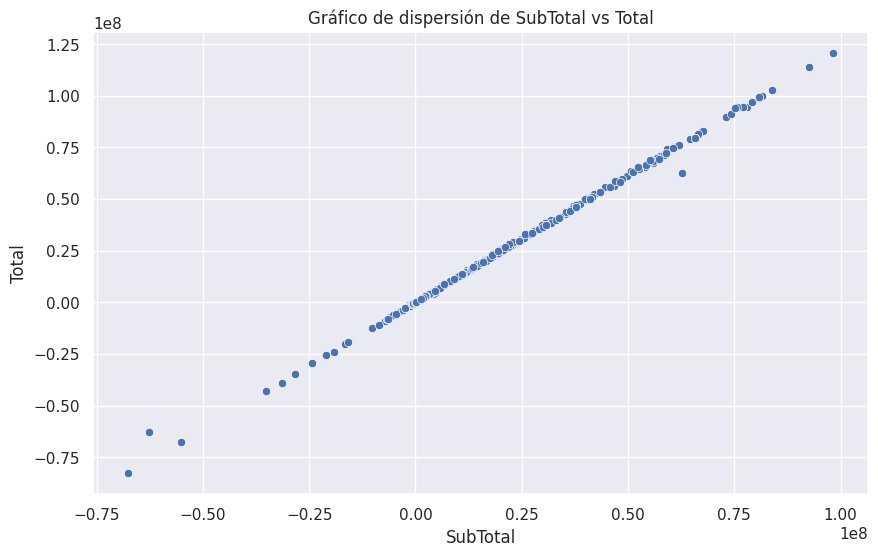

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='SubTotal', y='Total')
plt.xlabel('SubTotal')
plt.ylabel('Total')
plt.title('Gráfico de dispersión de SubTotal vs Total')
plt.show()

**Conclusión: se observa una fuerte correlación, el cual corresponde ya que la mayorias de los comprobantes emitidos se le aplica el 21% de IVA. las dispersiones existentes se envian a facturación para el analisis, seguramente corresponderan a ajustes que estan "exentos".**

nota para los profes de Coderhouse: tuve que utilizar estas variables, ya que el dataset no tenia ninguna relación racional para aplicar el gráfico, por lo cual, por más que sea evidente esta relación, me parecio la más sensata para presentar y sublimar lo que aprendi en la cursada.




